In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [4]:
"""
We need to access to the global aid data dataset from the midterm, but it's huge and with a lot of 
extra data. We only want the countries in Africa and South America. To make things easier, we'll 
just export it to its own file.
"""

file_path = '../data/AidDatasGlobalChineseDevelopmentFinanceDataset_v3.0.xlsx'

df = pd.read_excel(file_path, sheet_name='GCDF_3.0')

filtered_df = df[df['Recipient Region'].isin(['Africa', 'America'])]

filtered_df.to_csv('../data/Filtered_AidData.csv', index=False)

In [5]:
"""
The seaport data set ONLY contains financial data for the port projects. In order to determine debt
amount, we need to see how much (total) China has loaned each country so we can get a feel for the
conditions of debt trapping. So we'll combine the seaport loan amounts with the inland projects as well.
"""
all_africa_df = pd.read_csv('../data/Filtered_AidData.csv')

all_africa_df.sample(5)

C:\Users\darks\AppData\Local\Temp\ipykernel_6948\246188719.py:6: DtypeWarning: Columns (23,91,92,97) have mixed types. Specify dtype option on import or set low_memory=False.
  all_africa_df = pd.read_csv('../data/Filtered_AidData.csv')


,AidData Record ID,Recommended For Aggregates,AidData Parent ID,Umbrella,Financier Country,Recipient,Recipient ISO-3,Recipient Region,Commitment Year,Implementation Start Year,...,OECD ODA Income Group,Location Narrative,Geographic Level of Precision Available,ADM1 Level Available,ADM2 Level Available,Geospatial Feature Available,Source Quality Score,Data Completeness Score,Implementation Detail Score,Loan Detail Score
5493,53214,Yes,NaN,No,China (People's Republic of),Botswana,BWA,Africa,2015,2015.0,...,Upper middle income,This project supported Lentsweletau Primary Sc...,Precise,Yes,Yes,Yes,4,4,5.0,NaN
10363,1186,No,NaN,Yes,China (People's Republic of),Mozambique,MOZ,Africa,2007,NaN,...,Low income,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN
9382,59711,Yes,516,No,China (People's Republic of),Madagascar,MDG,Africa,2009,2009.0,...,Low income,NaN,NaN,NaN,NaN,NaN,4,2,4.0,NaN
4306,59588,Yes,NaN,No,China (People's Republic of),Mali,MLI,Africa,2017,2017.0,...,Low income,The purpose of the project is to donate 85 mil...,Precise,Yes,Yes,Yes,4,2,4.0,NaN
3182,71542,Yes,NaN,No,China (People's Republic of),Haiti,HTI,America,2018,2018.0,...,Low income,NaN,NaN,NaN,NaN,NaN,5,2,3.0,NaN


In [12]:
africa_seaport_df = pd.read_csv(
    '../data/china-seaport-dataset-filtered-africa-south-america.csv')

africa_seaport_df.sample(5)

,Unnamed: 0,port_name,Recipient,region,commitment_year,aiddata_tuff_project_id,recommended_for_aggregates,umbrella,financier_country,implementation_start_year,...,funding_agencies,cofinancing_agencies,receiving_agencies,implementing_agencies,accountable_agencies,amount_constant_usd2021,latitude,longitude,osm_link,precision_level
4,4,Autonomous Port of Kribi,Cameroon,Africa,2017,53396,Yes,No,China (People's Republic of),0,...,Export-Import Bank of China (China Eximbank),NaN,"Cameroon Ministry of Economy, Planning, and Re...","China Harbour Engineering Co., Ltd.|Government...",NaN,6.044935e+08,2.728108,9.867072,https://www.openstreetmap.org/way/325526034,precise
12,20,Doraleh Multipurpose Port and Damerjog Livesto...,Djibouti,Africa,2016,59375,Yes,No,China (People's Republic of),2014,...,Export-Import Bank of China (China Eximbank),Industrial and Commercial Bank of China (ICBC),Government of Djibouti,China Civil Engineering Construction Corporati...,NaN,4.067551e+08,11.596910,43.069199,https://www.openstreetmap.org/way/480879281,precise
44,103,Porto Sao Luis,Brazil,South America,2018,62973,No,No,China (People's Republic of),2018,...,Industrial and Commercial Bank of China (ICBC),NaN,"China Communications Construction Co., Ltd. (C...","China Communications Construction Co., Ltd. (C...",NaN,0.000000e+00,-2.573857,-44.365872,https://www.openstreetmap.org/relation/10189309,precise
52,117,Port Sudan,Sudan,Africa,2006,97760,Yes,No,China (People's Republic of),2007,...,"China Harbour Engineering Co., Ltd. (CHEC)",NaN,Sea Ports Corporation (SPC),"China Harbour Engineering Co., Ltd. (CHEC)",NaN,1.899872e+08,19.619300,37.233800,https://www.openstreetmap.org/way/543381630#ma...,precise
20,55,Lomé Container Terminal,Togo,Africa,2011,64343,Yes,No,China (People's Republic of),0,...,China Development Bank (CDB),African Development Bank (AfDB) (ADB) (BAD)|Ge...,Lomé Container Terminal S.A. (LCT),Autonomous Port of Lomé (PAL)|China Merchants ...,NaN,5.736161e+07,6.137487,1.275443,https://www.openstreetmap.org/way/696787047#ma...,precise


In [13]:
"""
Both dataframes are set, now we merge them on Recipient. We need to total all the projects
sums together.
"""
all_africa_grouped = all_africa_df.groupby(
    'Recipient')['Amount (Nominal USD)'].sum().reset_index()
# Renaming columns for clarity
all_africa_grouped.columns = ['Recipient', 'total_debt']

In [14]:
# We use 'Recipient' as the join.
africa_seaport_df = africa_seaport_df.merge(
    all_africa_grouped, on='Recipient', how='left')

# We add it to teh seaport DF with a new column holding the project sums.
africa_seaport_df.rename(
    columns={'total_debt': 'Total chinese debt'}, inplace=True)

In [15]:
africa_seaport_df.sample(10)

,Unnamed: 0,port_name,Recipient,region,commitment_year,aiddata_tuff_project_id,recommended_for_aggregates,umbrella,financier_country,implementation_start_year,...,cofinancing_agencies,receiving_agencies,implementing_agencies,accountable_agencies,amount_constant_usd2021,latitude,longitude,osm_link,precision_level,Total chinese debt
10,17,Conakry Port,Guinea,Africa,2018,52260,No,No,China (People's Republic of),0,...,Unspecified Chinese Bank,Government of Guinea,"China Harbour Engineering Co., Ltd.",NaN,7.170121e+08,9.514085,-13.717324,https://www.openstreetmap.org/relation/3611544,precise,2.743282e+10
54,119,Port Sudan,Sudan,Africa,2001,97783,Yes,No,China (People's Republic of),2001,...,NaN,Sea Ports Corporation (SPC),"China Harbour Engineering Co., Ltd. (CHEC)",NaN,2.778564e+07,19.598400,37.227000,https://www.openstreetmap.org/way/627215576,precise,1.790960e+10
57,122,Nouadhibou Fishing Port,Mauritania,Africa,2018,97756,Yes,No,China (People's Republic of),0,...,NaN,Hongdong International (Mauritania) Fishery De...,Hongdong International (Mauritania) Fishery De...,China Export & Credit Insurance Corporation (S...,6.591315e+07,20.899400,-17.053700,https://www.openstreetmap.org/way/251458394#ma...,precise,2.588980e+09
39,95,Port of Soyo,Angola,Africa,2016,73904,Yes,No,China (People's Republic of),2016,...,NaN,Government of Angola,"China Harbour Engineering Co., Ltd.|Government...",NaN,7.084827e+07,-6.133377,12.371755,NaN,approximate location,8.352824e+10
15,24,Government Wharf,Sierra Leone,Africa,2018,86649,Yes,No,China (People's Republic of),0,...,NaN,Republic of Sierra Leone Armed Forces (RSLAF),NaN,NaN,0.000000e+00,8.490955,-13.236596,https://www.openstreetmap.org/node/3340079730,boundary not clear,5.516157e+09
14,22,DP World Posorja,Ecuador,South America,2018,73745,Yes,No,China (People's Republic of),0,...,Germany Development Bank (KFW)|IDB Invest (Int...,DP Word Posorja,"China Harbour Engineering Co., Ltd.|Guayaquil ...",NaN,5.449249e+07,-2.693399,-80.248845,NaN,approximate location,3.899447e+10
29,75,Port of Bata,Equatorial Guinea,Africa,2007,1056,Yes,No,China (People's Republic of),2008,...,NaN,Government of Equatorial Guinea,CCCC First Harbor Engineering Company Ltd.|Chi...,NaN,6.593594e+08,1.819832,9.749290,https://www.openstreetmap.org/relation/9102676,precise,1.348630e+10
3,3,Autonomous Port of Kribi,Cameroon,Africa,2017,53116,Yes,No,China (People's Republic of),0,...,NaN,"Cameroon Ministry of Economy, Planning, and Re...","China Harbour Engineering Co., Ltd.|Government...",NaN,1.705286e+08,2.728108,9.867072,https://www.openstreetmap.org/way/325526034,precise,8.482297e+09
16,48,Jamestown Fishing Harbour,Ghana,Africa,2018,73222,Yes,No,China (People's Republic of),2020,...,NaN,Government of Ghana,CCCC First Harbor Engineering Company Ltd.|Chi...,NaN,5.449249e+07,5.535077,-0.208717,https://www.openstreetmap.org/node/7154068086,boundary not clear,3.657813e+10
19,54,Lekki Deep Sea Port,Nigeria,Africa,2019,85628,Yes,No,China (People's Republic of),2020,...,NaN,Lekki Port LFTZ Enterprise Limited,"China Harbour Engineering Co., Ltd.|Lekki Port...",China Export & Credit Insurance Corporation (S...,7.067221e+08,6.427862,4.009314,https://www.openstreetmap.org/way/785409163#ma...,precise,7.184355e+10


In [16]:
"""
Now that we have total chinese debt amount, we want to contrast that with the country's GDP.
China likes to debt trap low-to-middle income countries, so we need to set that ratio.
"""

gdp_df = pd.read_csv('../data/world-bank-global-gpd-2021.csv')

gdp_df.sample(5)

,Country Name,Country Code,2021
46,Comoros,COM,1.296089e+09
14,Austria,AUT,4.792954e+11
165,Mozambique,MOZ,1.616806e+10
141,Lesotho,LSO,2.406781e+09
248,Ukraine,UKR,1.997659e+11


In [24]:
"""
There is no "recipient" column in the GDP data, so we'll rename a column and then join on it.
"""

gdp_df.rename(columns={'Country Name': 'Recipient',
              '2021': 'GDP in 2021'}, inplace=True)

gdp_df.sample(5)

africa_seaport_df = africa_seaport_df.merge(
    gdp_df[['Recipient', 'GDP in 2021']], on='Recipient', how='left')

In [25]:
africa_seaport_df.sample(5)

,Unnamed: 0,port_name,Recipient,region,commitment_year,aiddata_tuff_project_id,recommended_for_aggregates,umbrella,financier_country,implementation_start_year,...,receiving_agencies,implementing_agencies,accountable_agencies,amount_constant_usd2021,latitude,longitude,osm_link,precision_level,Total chinese debt,GDP in 2021
22,57,Mangapwani Multipurpose Port,Tanzania,Africa,2013,30937,No,No,China (People's Republic of),0,...,Government of Tanzania,"China Harbour Engineering Co., Ltd.|Zanzibar P...",NaN,2.256073e+08,-6.167462,39.248555,NaN,approximate location,1.421742e+10,7.065563e+10
38,88,Port of Nacala,Mozambique,Africa,2017,57652,Yes,No,China (People's Republic of),2017,...,Corredor Logístico Integrado De Nacala SA,Corredor Logístico Integrado De Nacala SA|Chin...,NaN,2.304676e+08,-14.532762,40.623530,https://www.openstreetmap.org/way/325196105,precise,8.960255e+09,1.616806e+10
51,113,Sierra Leone Fish Harbour,Sierra Leone,Africa,2019,62533,Yes,No,China (People's Republic of),0,...,Government of Sierra Leone|Sierra Leone Minist...,Zhejiang Communications Construction Group Co Ltd,NaN,7.362901e+07,8.272123,-13.167560,NaN,approximate location,5.516157e+09,4.249235e+09
31,77,Port of Cabinda,Angola,Africa,2016,66866,Yes,No,China (People's Republic of),0,...,Government of Angola,China Gezhouba Group Company Ltd. (CGGC)|Gover...,NaN,6.612505e+07,-5.551103,12.195669,https://www.openstreetmap.org/way/234796859,precise,8.352824e+10,6.650513e+10
35,83,Port of Goubet,Djibouti,Africa,2012,30346,Yes,No,China (People's Republic of),2013,...,Djiboutian Ministry of Economy and Finance,"China Harbour Engineering Co., Ltd. (CHEC)",NaN,7.928452e+07,11.535403,42.520562,https://www.openstreetmap.org/relation/11199579,precise,2.854667e+09,3.385825e+09


C:\Users\darks\AppData\Local\Temp\ipykernel_6948\1179861966.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  africa_df['Total chinese debt'] = pd.to_numeric(
C:\Users\darks\AppData\Local\Temp\ipykernel_6948\1179861966.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  africa_df['GDP in 2021'] = pd.to_numeric(


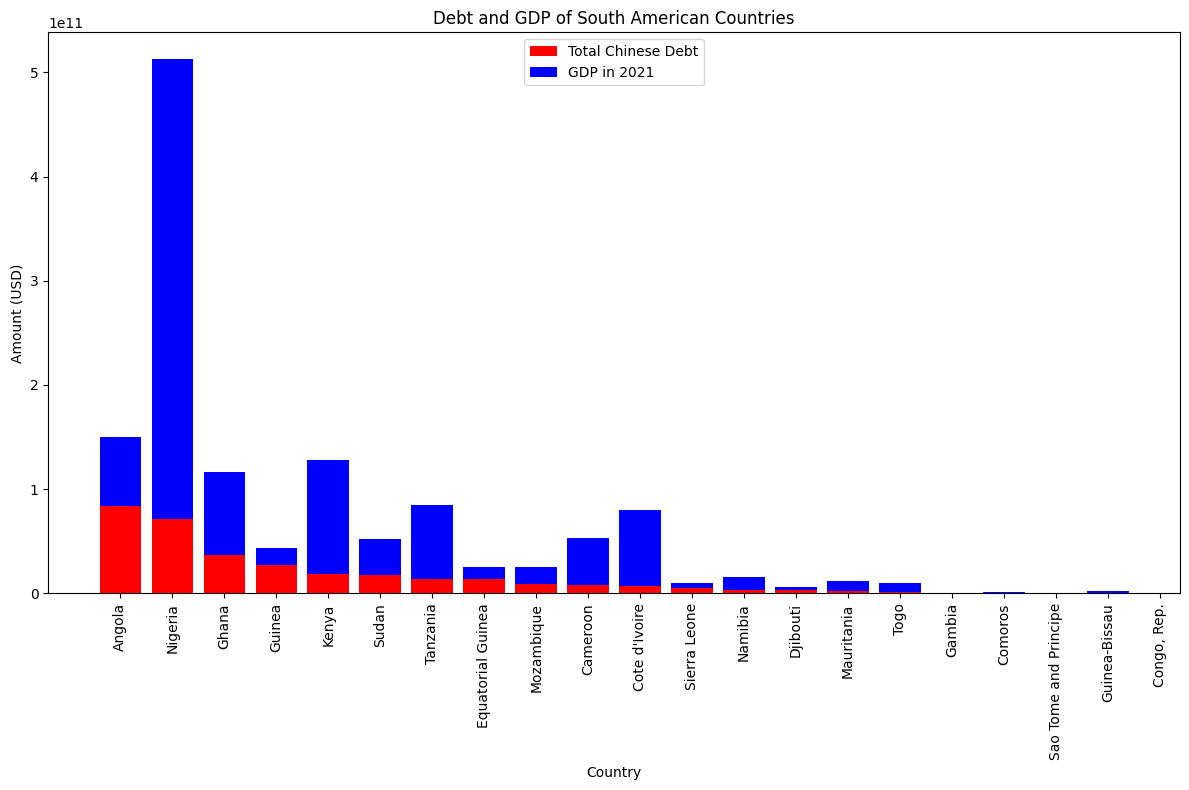

In [39]:
# Filter the dataframe to include only African countries
africa_df = africa_seaport_df[africa_seaport_df['region'] == 'Africa']

# Make sure everything is numeric.
africa_df['Total chinese debt'] = pd.to_numeric(
    africa_df['Total chinese debt'], errors='coerce')
africa_df['GDP in 2021'] = pd.to_numeric(
    africa_df['GDP in 2021'], errors='coerce')

# Sort the dataframe by GDP in descending order by Debt amount.
# This will look weird at first glance but make more sense from a debt ratio standpoint
africa_df = africa_df.sort_values(by='Total chinese debt', ascending=False)

# Set graph size
plt.figure(figsize=(12, 8))

# Plot the rows
for index, row in africa_df.iterrows():
    plt.bar(row['Recipient'], row['Total chinese debt'], color='red',
            label='Total Chinese Debt' if index == 0 else "")
    plt.bar(row['Recipient'], row['GDP in 2021'], bottom=row['Total chinese debt'],
            color='blue', label='GDP in 2021' if index == 0 else "")

plt.xlabel('Country')
plt.ylabel('Amount (USD)')
plt.title('Debt and GDP of South American Countries')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()